In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib


In [20]:
df = pd.read_csv('../data/parkinsons.csv')
df.head(6)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [21]:
y = df['status']
y.unique()

array([1, 0], dtype=int64)

In [22]:
X = df.drop(['status','name'],axis = 1)

In [23]:
def get_pearson_corr_matrix(df: pd.DataFrame) -> pd.DataFrame:
    ### BEGIN SOLUTION
    return df.corr(method="pearson")
    ### END SOLUTION

In [24]:
# Tạo correlation matrix từ hàm đã viết
corr_matrix = get_pearson_corr_matrix(X)

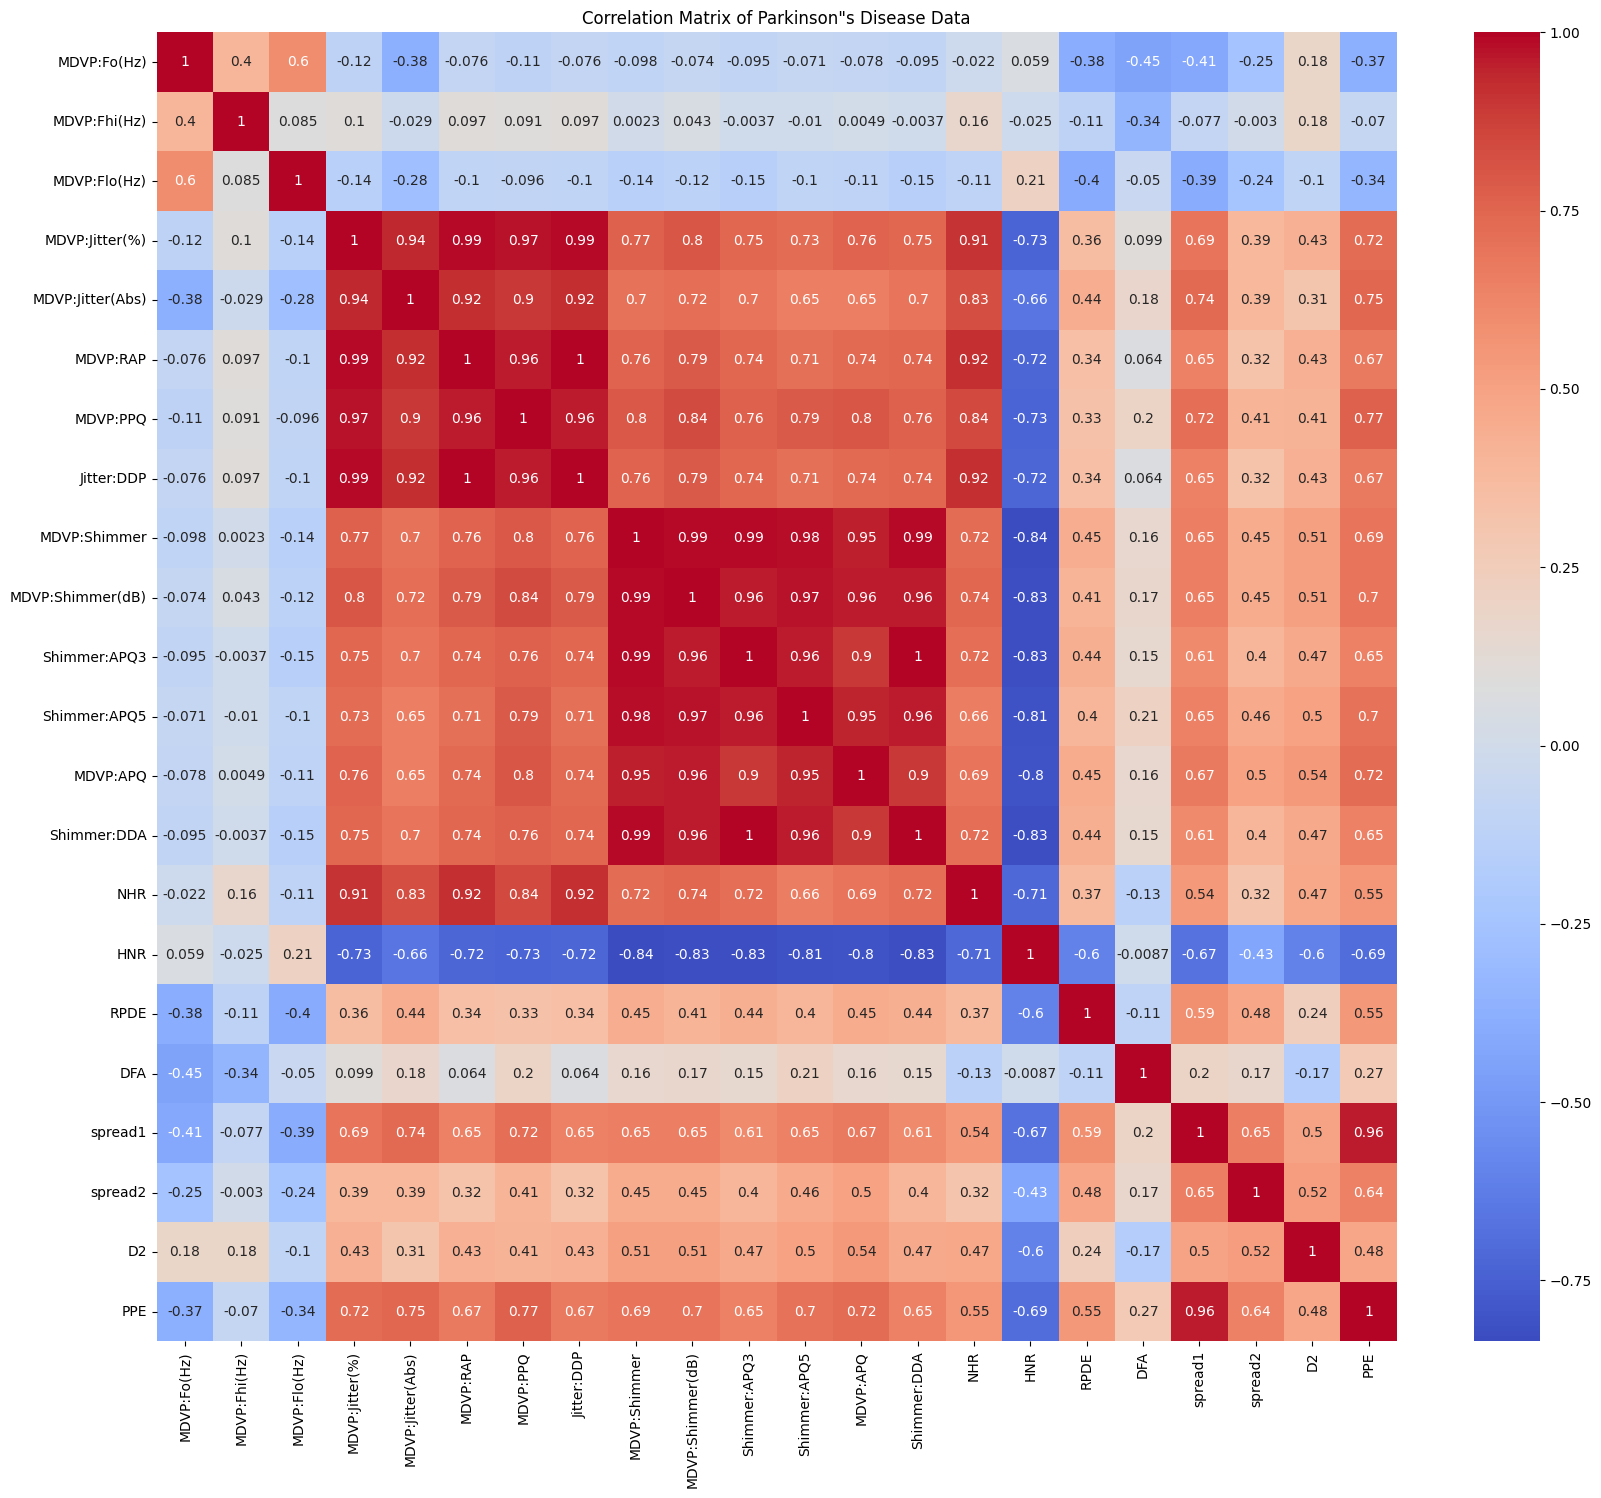

In [25]:
# Plot the correlation matrix
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Parkinson"s Disease Data')
plt.show()

In [26]:
def drop_highly_correlated_features(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    ### BEGIN SOLUTION
    target_col = "status" if "status" in df.columns else None
    feature_cols = [col for col in df.columns if col != target_col]
    
    corr_matrix = df[feature_cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    retained_cols = [col for col in df.columns if col not in to_drop]
    return df[retained_cols]
    ### END SOLUTION

In [27]:
# Khởi tạo giá trị correlation_threshold là 0.7
correlation_threshold = 0.7
# Tiến hành loại bỏ những đặc trưng
X = drop_highly_correlated_features(X, correlation_threshold)

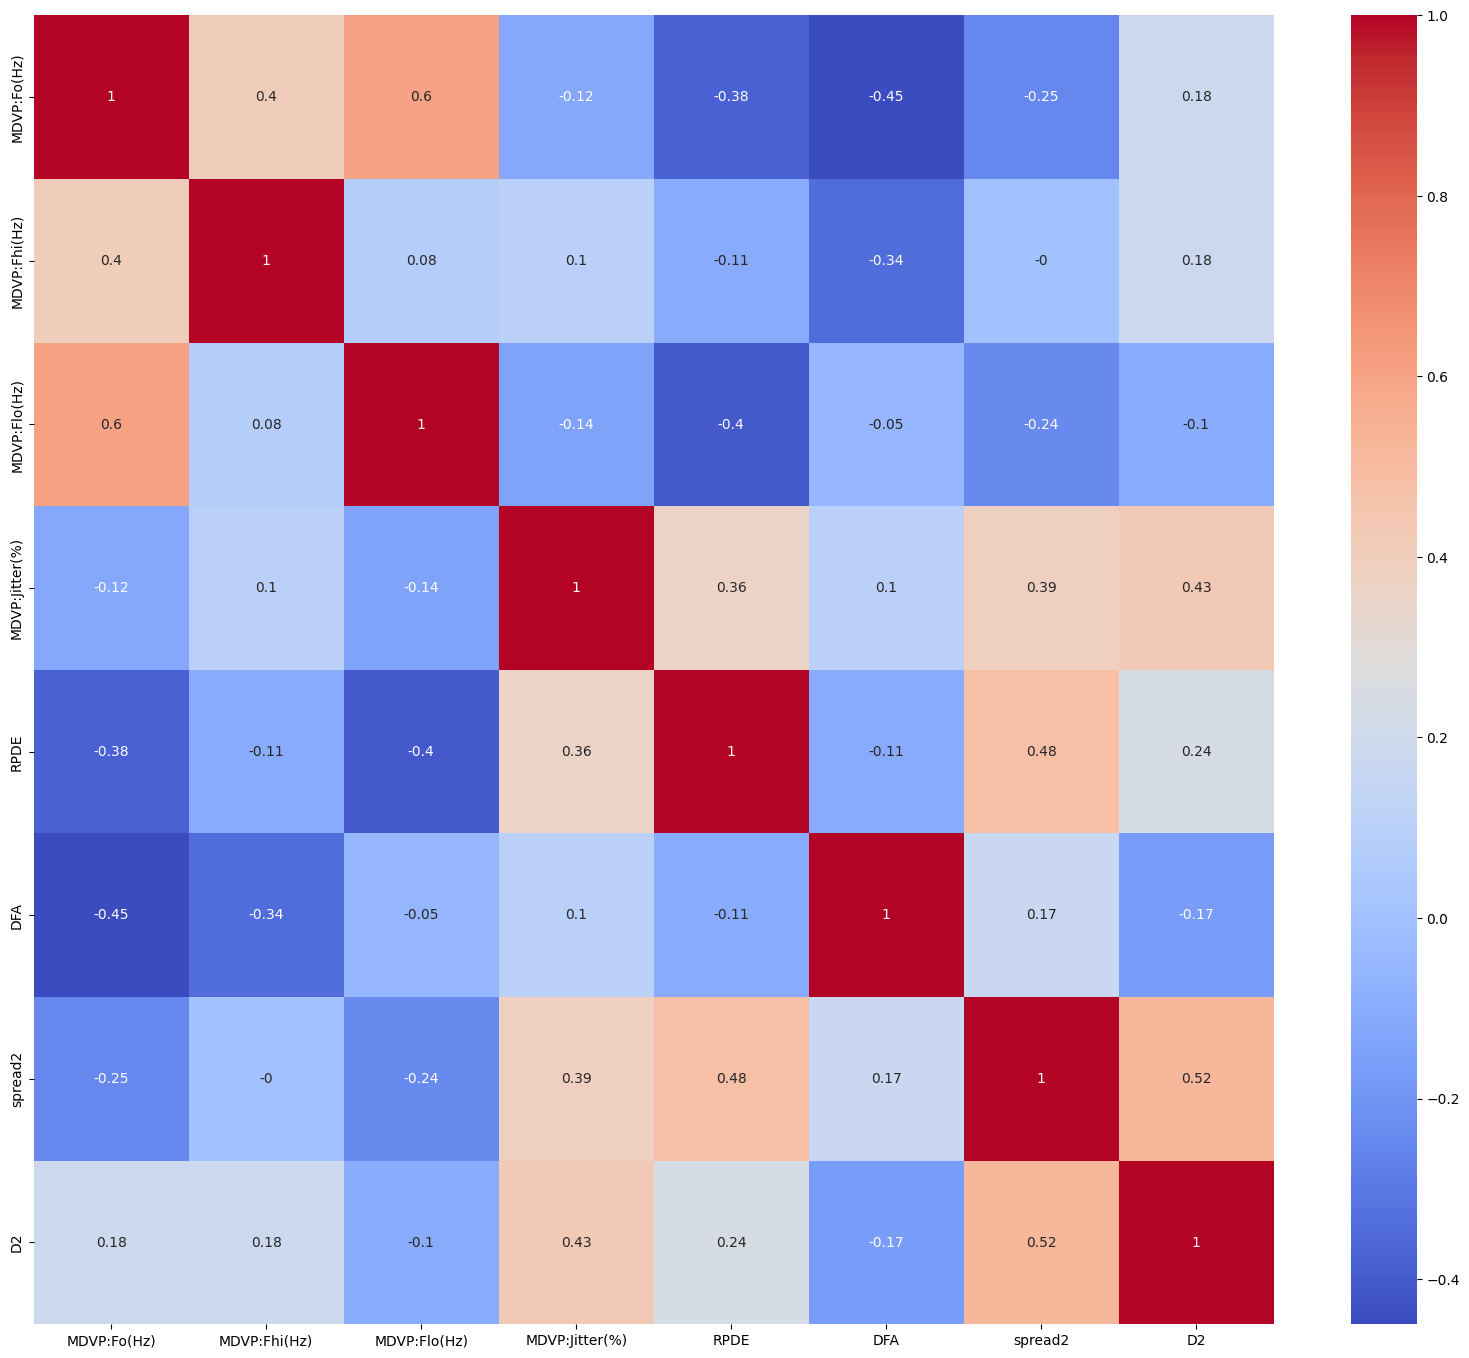

In [28]:
corr_matrix = get_pearson_corr_matrix(X)
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [30]:
print(X.columns)
print(len(X.columns))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'RPDE',
       'DFA', 'spread2', 'D2'],
      dtype='object')
8


In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

joblib.dump(scaler,'./model/scaler.pkl')
print('\nScaler saved successfully!')



Scaler saved successfully!


In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23520945)

In [34]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 89.74%
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.89      0.96      0.93        26

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39



c:\Users\Admin\anaconda3\envs\GPU\lib\site-packages\xgboost\core.py:158: UserWarning: [07:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
import joblib

# Save the trained model
joblib.dump(model, './model/parkinsons_xgboost_model.pkl')

['./model/parkinsons_xgboost_model.pkl']

In [38]:
# Load the model
model = joblib.load('./model/parkinsons_xgboost_model.pkl')
test_size = round(len(y_test)/1)
# Predict on new data
new_pred = model.predict(X_test[:test_size])
print(f'Predictions: {new_pred}')
a = 0
for i in range(len(new_pred)):
    if (new_pred[i] == y[i]):
        # print(f'Prediction {i+1} is correct')
        a+=1
print(f'keke {a} and {test_size} and acc is {a/test_size}')

Predictions: [1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 1 0]
keke 28 and 39 and acc is 0.717948717948718
